# Regression

### Objective
1. Predict the Airbnb listing price with the available information of the individual listings in Seattle.
2. Explore the important factors that affect the prices of Airbnb listings in Seattle.

Blog: https://towardsdatascience.com/solving-regression-problems-by-combining-statistical-learning-with-machine-learning-82949f7ac18a

Dataset: https://www.kaggle.com/airbnb/seattle

In [2]:
import pandas as pd

In [12]:
# Importing dataset 
folderpath = "D:\\Personal\\Study\\Bits Pilani\\Git\python-basic-1\\Regression\\airbnb-seattle"
calendar = pd.read_csv(folderpath + "\\calendar.csv")
listings = pd.read_csv(folderpath + "\\listings.csv")
reviews = pd.read_csv(folderpath + "\\reviews.csv")

In [13]:
# Row*Col count
print("Calendar shape: {0} \nListings shape: {1} \nReviews shape: {2}".format(calendar.shape, listings.shape, reviews.shape))

Calender shape: (1393570, 4) 
Listings shape: (3818, 92) 
Reviews shape: (84849, 6)


In [16]:
# Columns
print("Calendar columns: {0} \nListings columns: {1} \nReviews columns: {2}".format(calendar.columns, listings.columns, reviews.columns))

Calender columns: Index(['listing_id', 'date', 'available', 'price'], dtype='object') 
Listings columns: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'proper

In [18]:
# Clearing memory by flusing calendar and review data as it won't be used
calendar = []
reviews =[]

### Analysing data and columns 

In [17]:
# Split Listings by data types and check them in chunks
listings.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [19]:
listings.columns[listings.dtypes == object]

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [20]:
listings.columns[listings.dtypes != object]

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [24]:
listings[["host_response_rate","host_acceptance_rate","weekly_price", "monthly_price","security_deposit","cleaning_fee","extra_people"]].head()

,host_response_rate,host_acceptance_rate,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,96%,100%,NaN,NaN,NaN,NaN,$5.00
1,98%,100%,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00
2,67%,100%,NaN,NaN,"$1,000.00",$300.00,$25.00
3,NaN,NaN,$650.00,"$2,300.00",NaN,NaN,$0.00
4,100%,NaN,NaN,NaN,$700.00,$125.00,$15.00


In [31]:
# Unique values of few columns
print("property_type\t" + str(listings["property_type"].unique()), end="\n\n")
print("room_type\t" + str(listings["room_type"].unique()), end="\n\n")
print("bed_type\t" + str(listings["bed_type"].unique()), end="\n\n")
print("cancellation_policy\t" + str(listings["cancellation_policy"].unique()), end="\n\n")
print("city\t" + str(listings["city"].unique()), end="\n\n")
print("market\t" + str(listings["market"].unique()), end="\n\n")
print("host_is_superhost\t" + str(listings["host_is_superhost"].unique()), end="\n\n")
print("host_identity_verified\t" + str(listings["host_identity_verified"].unique()), end="\n\n")
print("host_response_time\t" + str(listings["host_response_time"].unique()), end="\n\n")
print("instant_bookable\t" + str(listings["instant_bookable"].unique()), end="\n\n")
print("neighbourhood\t" + str(listings["neighbourhood"].unique()), end="\n\n")
print("neighbourhood_cleansed\t" + str(listings["neighbourhood_cleansed"].unique()), end="\n\n")
print("neighbourhood_group_cleansed\t" + str(listings["neighbourhood_group_cleansed"].unique()), end="\n\n")

property_type	['Apartment' 'House' 'Cabin' 'Condominium' 'Camper/RV' 'Bungalow'
 'Townhouse' 'Loft' 'Boat' 'Bed & Breakfast' 'Other' 'Dorm' 'Treehouse'
 'Yurt' 'Chalet' 'Tent' nan]

room_type	['Entire home/apt' 'Private room' 'Shared room']

bed_type	['Real Bed' 'Futon' 'Pull-out Sofa' 'Airbed' 'Couch']

cancellation_policy	['moderate' 'strict' 'flexible']

city	['Seattle' 'Ballard, Seattle' 'West Seattle' 'Seattle ' '西雅图'
 'Phinney Ridge Seattle' 'seattle']

market	['Seattle']

host_is_superhost	['f' 't' nan]

host_identity_verified	['t' 'f' nan]

host_response_time	['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']

instant_bookable	['f' 't']

neighbourhood	['Queen Anne' nan 'Ballard' 'Phinney Ridge' 'Fremont' 'Lower Queen Anne'
 'Westlake' 'Wallingford' 'Green Lake' 'Minor' 'Madrona'
 'Harrison/Denny-Blaine' 'Leschi' 'University District' 'Roosevelt'
 'Madison Park' 'Capitol Hill' 'Atlantic' 'North Beacon Hill'
 'Central Business District' 'Pike Place M

In [32]:
listings[["neighbourhood", "neighbourhood_cleansed","neighbourhood_group_cleansed"]].isnull().sum()

neighbourhood                   416
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
dtype: int64

In [33]:
listings[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location']].head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
0,95.0,10.0,10.0,10.0,10.0,9.0
1,96.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0


### Exploratory Analysis

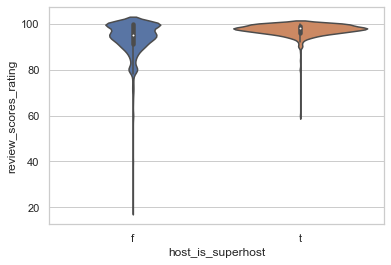

In [34]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.violinplot(x="host_is_superhost", y="review_scores_rating", data=listings)

In [47]:
# Cleaning price data before ploting graph
listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','')
listings['price'] = pd.to_numeric(listings['price'])

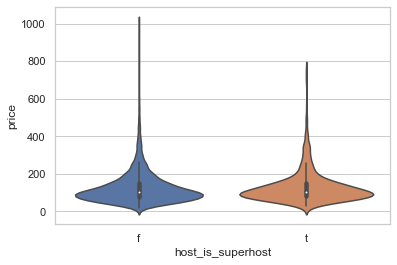

In [48]:
ay = sns.violinplot(x="host_is_superhost", y="price", data=listings)

In [61]:
# function to clean property type data
def mergePropertyTypes(propertytype):
    if(propertytype =="Cabin" or propertytype =="Camper/RV"or propertytype =="Bungalow" or propertytype =="Loft" or propertytype =="Boat" or propertytype =="Bed & Breakfast" or propertytype =="Dorm" or propertytype =="Treehouse" or propertytype =="Treehouse" or propertytype =="Yurt" or propertytype =="Chalet" or propertytype =="Tent" or str(propertytype)=="nan"):
        propertytype ="Other"
    elif(propertytype =="Townhouse" or propertytype =="Condominium"):
        propertytype ="Townhouse & Condom"
    return propertytype

In [63]:
# new column with clened property type
listings["property_type_cleaned"] = listings["property_type"].apply(mergePropertyTypes)
listings["property_type_cleaned"].unique()

array(['Apartment', 'House', 'Other', 'Townhouse & Condom'], dtype=object)

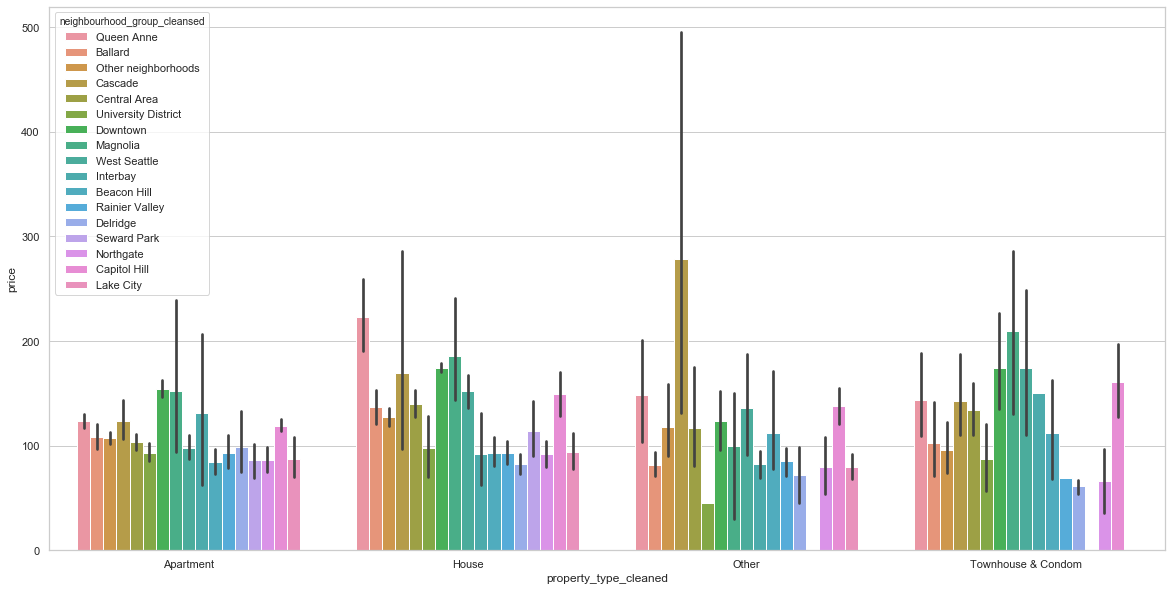

In [66]:
# Average price by Neighbourhood by Property Type
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="property_type_cleaned", y="price", hue="neighbourhood_group_cleansed", data=listings)